In [1]:
# 대신증권 연결 확인
import win32com.client

instCpCybos = win32com.client.Dispatch("CpUtil.CpCybos")
print(instCpCybos.IsConnect)

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

1


In [32]:
# 분 차트 받아오기
def get_min(code,today,start,time,j):  # 종목, 기간, 오늘, 시점, 분, 시간간격
#     today = datetime.today().strftime("%Y%m%d") 
#     start = (datetime.today() - timedelta(j)).strftime("%Y%m%d") 
#     print(start, today)
    instStockChart = win32com.client.Dispatch("CpSysDib.StockChart")
    instStockChart.SetInputValue(0, code )
    instStockChart.SetInputValue(1, ord('1'))
    instStockChart.SetInputValue(2, start)
    instStockChart.SetInputValue(3, today)
    # instStockChart.SetInputValue(4, 1000)
    instStockChart.SetInputValue(5, (0,1,5,6))
    instStockChart.SetInputValue(6, ord('m'))  # 'm' : 분, 'T' : 틱
    instStockChart.SetInputValue(7, time)      # 데이터 주기
    instStockChart.SetInputValue(9, ord('1'))
    instStockChart.SetInputValue(10, 3)

    instStockChart.BlockRequest()

    numData = instStockChart.GetHeaderValue(3)
    numField = instStockChart.GetHeaderValue(1) 

    temp = {}
    for i in range(numData):
        temp[str(instStockChart.GetDataValue(0, i)) +'.'+ str(instStockChart.GetDataValue(1, i))] = \
                [instStockChart.GetDataValue(2, i),round(instStockChart.GetDataValue(3, i),6)]
    temp = pd.DataFrame(temp).transpose()
    temp.index.names = ['time']
    return temp


def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    print(begin-1)
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin-1:end]

0.00253592561284869

# - 과거 1분단위 데이터 받아오기

In [291]:
temp0 =get_min('A122630',20200929,20201013,1,1)[::-1]
temp1 =get_min('A122630',20201014,20201105,1,1)[::-1]
temp2 = get_min('A122630',20201106,20201130,1,1)[::-1]
temp3 = get_min('A122630',20201201,20201230,1,1)[::-1]
# temp0
df = pd.concat([temp0,temp1,temp2,temp3])
df.to_pickle('kodex_x2')
df = pd.read_pickle('kodex_x2')

In [23]:
kodex200 = pd.read_pickle('kodex200')
kodex_x2 = pd.read_pickle('kodex_x2')
kodex_inv = pd.read_pickle('kodex_inversex2')
kodex_active = pd.read_pickle('kodex_active')
# tiger_active = pd.read_pickle('tiger_active')
temp =  pd.merge(left = kodex200 , right = kodex_x2, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = kodex_inv, how = "inner", on = "time")
temp =  pd.merge(left = temp , right = kodex_active, how = "inner", on = "time")
# temp =  pd.merge(left = temp , right = tiger_active, how = "inner", on = "time")
temp.columns = ['kodex200','kodex_x2','kodex_invx2','kodex_active']
temp

,kodex200,kodex_x2,kodex_invx2,kodex_active
time,,,,
20200929.901,31030,14695,4190,10040
20200929.902,31010,14685,4195,10020
20200929.903,31035,14700,4190,10015
20200929.904,31015,14690,4195,10005
20200929.905,31010,14685,4195,10000
20200929.906,30995,14670,4200,9995
20200929.907,31040,14710,4190,10010
20200929.909,31015,14685,4190,9995
20200929.910,31015,14690,4195,9995


# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [317]:
day = {}
for date in range(20200929,20201227):
    temps = None
    temps = one_day(temp,date)
    try:
        temps['kodex200_dayret'] = np.log(temps['kodex200']/temps['kodex200'][0])
        temps['kodex_active_dayret'] = np.log(temps['kodex_active']/temps['kodex_active'][0])
        temps['ret_spread'] = temps['kodex_active_dayret'] - temps['kodex200_dayret']
        day[str(date)] = temps
    except:
        pass

C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

20200930 는 공휴일 입니다.
20200931 는 공휴일 입니다.
20200932 는 공휴일 입니다.
20200933 는 공휴일 입니다.
20200934 는 공휴일 입니다.
20200935 는 공휴일 입니다.
20200936 는 공휴일 입니다.
20200937 는 공휴일 입니다.
20200938 는 공휴일 입니다.
20200939 는 공휴일 입니다.
20200940 는 공휴일 입니다.
20200941 는 공휴일 입니다.
20200942 는 공휴일 입니다.
20200943 는 공휴일 입니다.
20200944 는 공휴일 입니다.
20200945 는 공휴일 입니다.
20200946 는 공휴일 입니다.
20200947 는 공휴일 입니다.
20200948 는 공휴일 입니다.
20200949 는 공휴일 입니다.
20200950 는 공휴일 입니다.
20200951 는 공휴일 입니다.
20200952 는 공휴일 입니다.
20200953 는 공휴일 입니다.
20200954 는 공휴일 입니다.
20200955 는 공휴일 입니다.
20200956 는 공휴일 입니다.
20200957 는 공휴일 입니다.
20200958 는 공휴일 입니다.
20200959 는 공휴일 입니다.
20200960 는 공휴일 입니다.
20200961 는 공휴일 입니다.
20200962 는 공휴일 입니다.
20200963 는 공휴일 입니다.
20200964 는 공휴일 입니다.
20200965 는 공휴일 입니다.
20200966 는 공휴일 입니다.
20200967 는 공휴일 입니다.
20200968 는 공휴일 입니다.
20200969 는 공휴일 입니다.
20200970 는 공휴일 입니다.
20200971 는 공휴일 입니다.
20200972 는 공휴일 입니다.
20200973 는 공휴일 입니다.
20200974 는 공휴일 입니다.
20200975 는 공휴일 입니다.
20200976 는 공휴일 입니다.
20200977 는 공휴일 입니다.
20200978 는 공휴일 입니다.
20200979 는 공휴일 입니다.


IndexError: index 0 is out of bounds for axis 0 with size 0

In [312]:
day['20201002']

KeyError: '20201002'

# - KODEX200~ KODEX_active 공적분 분석

In [169]:
kodex200 = pd.read_pickle('kodex200')
kodex_active = pd.read_pickle('kodex_active')
# tiger_active = pd.read_pickle('tiger_active')
temp =  pd.merge(left = kodex200 , right = kodex_active, how = "inner", on = "time")
# temp =  pd.merge(left = temp , right = tiger_active, how = "inner", on = "time")
temp.columns = ['kodex200','kodex_active']
score, pvalue, _ = coint(temp['kodex200'],temp['kodex_active'])
print('minute : ',1,' , ','time interval : ',100,' , ','Cointegration test p-value: ' + str(pvalue))
print(temp.corr(method='pearson'))

# temp['kodex200_dayret'] = temp['kodex200'].pct_change() * 100
# temp['kodex_active_dayret'] = temp['kodex_active'].pct_change() * 100

# temp['kodex200_cumret'] = np.log(temp['kodex200']/temp['kodex200'][0])
# temp['kodex_active_cumret'] = np.log(temp['kodex_active']/temp['kodex_active'][0])

# temp['spread'] = temp['kodex200'] - temp['kodex_active']*3
# temp['ret_spread'] = temp['kodex_active_ret'] - temp['kodex200_ret']

minute :  1  ,  time interval :  100  ,  Cointegration test p-value: 0.15908878670532806
              kodex200  kodex_active
kodex200      1.000000      0.998785
kodex_active  0.998785      1.000000


#  - kodex - kosdaq 비교

In [266]:
temp = one_day(temp,20201223)
temp['kodex200_dayret'] = np.log(temp['kodex200']/temp['kodex200'][0])
temp['kodex_active_dayret'] = np.log(temp['kodex_active']/temp['kodex_active'][0])
temp['ret_spread'] = temp['kodex_active_dayret'] - temp['kodex200_dayret']
temp

C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\chhch\anaconda3\envs\py36_32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,kodex200,kodex_inv,kodex_active,kodex200_dayret,kodex_active_dayret,ret_spread
time,,,,,,
20201223.901,36755,2930,11675,0.000000,0.000000,0.000000
20201223.917,36845,2915,11735,0.002446,0.005126,0.002680
20201223.927,36840,2915,11700,0.002310,0.002139,-0.000171
20201223.933,36785,2925,11710,0.000816,0.002993,0.002177
20201223.935,36800,2925,11710,0.001224,0.002993,0.001770
20201223.936,36790,2925,11710,0.000952,0.002993,0.002042
20201223.937,36745,2930,11695,-0.000272,0.001712,0.001984
20201223.938,36740,2935,11690,-0.000408,0.001284,0.001692
20201223.939,36715,2935,11680,-0.001089,0.000428,0.001517


In [284]:
l = 150
cash = -2935*4*l*(1.00015) - 11630*l*(1.00015)
cash

-3506025.825

In [285]:
eval = 2950*4*l*(1-0.00015) + 11635*1*l*(1-0.00015)

In [286]:
cash+eval

8696.887500000186

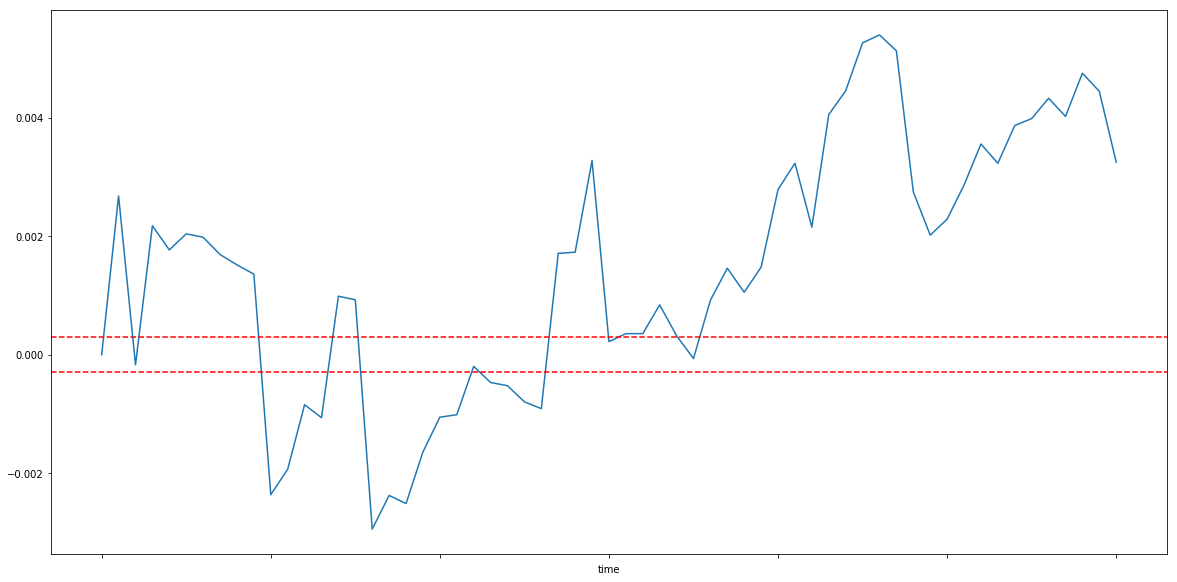

In [277]:
plt.rcParams["figure.figsize"] = (20, 10)
# temp[['kodex200_dayret','kodex_active_dayret']].plot()
temp['ret_spread'].plot()
plt.axhline((0.0003), color='red', linestyle='--')
plt.axhline((-0.0003), color='red', linestyle='--')

In [239]:
i = 0
for j in range(len(temp)):
    if round(abs(temp['ret_spread'].iloc[j]) < 0.00015) :
        i+=1
i

2

In [39]:
11145*30*1.00015+18660*30*1.00015

29809.470750000004